# Final Project Report

* Class: DS 5100
* Student Name: Manav Sheth
* Student Net ID: gfw8hq
* This URL: https://github.com/m112-s/DS5100_FinalProject/blob/main/DS51200_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL:https://github.com/m112-s/DS5100_FinalProject/tree/main

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [1]:
# A code block with your classes.

"""
import numpy as np
import pandas as pd

class Die:
    '''
    Class for creating a Die object with N sides and W weights, default weights = 1 
    '''
    def __init__(self, faces: np.ndarray):
        '''
        input: numpy array of face values 
        Method to initialize the Die, checking for incorrect inputs and giving initial weights
        output: faces and initial weight in a private dataframe, faces in the index 
        '''
        
        # Check Numpy array
        if not isinstance(faces, np.ndarray):
            raise TypeError("Faces not a NumPy array")
        
        # Check faces for duplicate values 
        if len(np.unique(faces)) != len(faces):
            raise ValueError("Die faces not distinct")
        
        # Initialize faces with weights = 1 
        self._df = pd.DataFrame({
            'weight': np.ones(len(faces))
        }, index=faces)
        
    def change_weight_one_side(self, face, new_weight):
        '''
        input: face value and new weight (must be numeric) 
        Method for chaning an individual face to a new weight. Checks if face is valid and weight is number 
        output: a dataframe with a replaced weight for specified face 
        '''
        # Check if face is valid
        if face not in self._df.index:
            raise IndexError("Face value not valid")
        
        # Check if new_weight is numeric
        try:
            new_weight = float(new_weight)
        except (TypeError, ValueError):
            raise TypeError("Weight must be a numeric type")
        
        # Set weights as called in method
        self._df.at[face, 'weight'] = new_weight
        
    def roll_die(self, num_rolls=1):
        '''
        input: number of rolls (not required) 
        Method for rolling a die an x number of times
        output: copy of private die dataframe 
        '''
        #Create random choice of faces based on weight 
        outcomes = np.random.choice(
            self._df.index,
            size=num_rolls,
            replace=True, #Allow for dupllicates 
            p=self._df['weight'] / self._df['weight'].sum() 
        )
        return outcomes.tolist()

    def current_state(self):
        '''
        Method for providing the current state of a die's weights 
        '''
        return self._df.copy()

    def __repr__(self):
        '''
        Method to help build function by providing printed outputs 
        '''
        return self._df.to_string()

    
class Game:
    '''
    Class for creating a game object with 1 or more dice used  
    '''
    def __init__(self, dice):
        '''
        input: List of dice objects 
        Method to initialize game with dice, also check for any incorrect inputs   
    
        '''
        
        # Make sure all dice used are the correct object type 
        for i in dice:
            if not isinstance(i, Die):
                raise ValueError("Input contains at least 1 non Die object")
        
        #Make sure all faces of each die are the exact same 
        first_die = set(dice[0].current_state().index)
        for i in dice:
            if set(i.current_state().index) != first_die:
                raise ValueError("All dice must have the same set of faces")

        self._dice = dice
        self._play_results = None

    def play(self, num_rolls):
        '''
        input: number for number of rolls 
        
        Method for playing all dice an x number of rolls and creating a dataframe of results 
        
        output: "wide" data frame of play results. 
        '''
        results = {}

        for i, die in enumerate(self._dice):
            results[i] = die.roll_die(num_rolls)

        self._play_results = pd.DataFrame(results)
        self._play_results.index.name = "Roll Number" 

    def show_results(self, form='wide'):
        '''
        input: form type (wide or narrow) 
        
        Method for choosing how to show results and showing the results
        
        output: results in specified format 
        '''
        if self._play_results is None:
            return None
        
        if form == 'wide':
            return self._play_results.copy()
        elif form == 'narrow':
            return self._play_results.stack().to_frame('Outcome')
        else:
            raise ValueError("Not expected either of expected values, 'wide' or 'narrow'.")

class Analyzer:
    '''
    Class for deriving analytics on each game object run 
    '''
    def __init__(self, game):
        '''
        input: game object 
        Initializing the analysis for a specific game type created
        Checks if input is a game and if the game has been played 

        '''
        if not isinstance(game, Game):
            raise ValueError("Input must be Game")
        
        self._game = game
        self._results = game.show_results(form='wide')
        
        if self._results is None:
            raise ValueError("The Game has no results")

    def jackpot(self):
        '''
        Method for checking for a jackpot
        output: returns an integer for number of "jackpots" 
        '''
        return (self._results.nunique(axis=1) == 1).sum()

    def face_counts_per_roll(self):
        '''
        Method for checking counts of a number per roll
        output: Data frame with an index of roll number and face values as columns and count values in cells 
        '''
        all_faces = pd.unique(self._results.values.ravel()) 
        counts = self._results.apply(lambda row: row.value_counts(), axis=1).fillna(0)
        return counts.reindex(columns=sorted(all_faces)).astype(int)

    def combo_count(self):
        '''
        Method for listing out all combinations of numbers (order does not matter) 
        output: a MultiIndex of distinct combinations and a column for the associated counts
        '''
        combos = self._results.apply(lambda row: tuple(sorted(row)), axis=1)
        combo_counts = combos.value_counts()
        return combo_counts.to_frame(name='Count')

    def permutation_count(self):
        '''
        Method for listing out all combinations of numbers (order matters) 
        output: data frame wiht a MultiIndex of distinct permutations and a column for the associated counts
        '''
        perms = self._results.apply(lambda row: tuple(row), axis=1)
        perm_counts = perms.value_counts()
        return perm_counts.to_frame(name='Count')


 
"""

'\nimport numpy as np\nimport pandas as pd\n\nclass Die:\n    \'\'\'\n    Class for creating a Die object with N sides and W weights, default weights = 1 \n    \'\'\'\n    def __init__(self, faces: np.ndarray):\n        \'\'\'\n        input: numpy array of face values \n        Method to initialize the Die, checking for incorrect inputs and giving initial weights\n        output: faces and initial weight in a private dataframe, faces in the index \n        \'\'\'\n        \n        # Check Numpy array\n        if not isinstance(faces, np.ndarray):\n            raise TypeError("Faces not a NumPy array")\n        \n        # Check faces for duplicate values \n        if len(np.unique(faces)) != len(faces):\n            raise ValueError("Die faces not distinct")\n        \n        # Initialize faces with weights = 1 \n        self._df = pd.DataFrame({\n            \'weight\': np.ones(len(faces))\n        }, index=faces)\n        \n    def change_weight_one_side(self, face, new_weight):\n

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [2]:
# A code block with your test code.
"""
import unittest
import numpy as np
import pandas as pd
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

class TestMonteCarlo(unittest.TestCase):
    
    def setUp(self):
        self.faces = np.array([1,2,3,4,5,6,7,8,9,10])
        self.die1 = Die(self.faces)
        self.die2 = Die(self.faces)
        self.die3 = Die(self.faces)
        
        self.die1.change_weight_one_side(10, 10)        
        self.die2.change_weight_one_side(2, 2.0)
        self.die3.change_weight_one_side(3, 3)
        
        self.game = Game([self.die1, self.die2, self.die3])
        self.game.play(5)
        self.analyzer = Analyzer(self.game)

    def test_die_init_valid(self):
        self.assertTrue(len(self.die1.current_state()) == 10)

    def test_die_init_invalid(self):
        with self.assertRaises(TypeError):
            Die([1, 2, 3])  # not a NumPy array

    def test_die_init_duplicate_faces(self):
        with self.assertRaises(ValueError):
            Die(np.array([1, 1, 1]))  

    def test_die_change_weight_valid(self):
        self.die1.change_weight_one_side(1, 2.5)
        actual = self.die1.current_state().loc[1, 'weight']
        self.assertTrue(actual == 2.5)

    def test_die_change_weight_invalid(self):
        with self.assertRaises(TypeError):
            self.die1.change_weight_one_side(2, "high")  

    def test_die_roll_die(self):
        rolls = self.die1.roll_die(3)
        self.assertTrue(isinstance(rolls, list))
        self.assertTrue(len(rolls) == 3)

    def test_die_current_state(self):
        df = self.die1.current_state()
        self.assertTrue('weight' in df.columns)
        self.assertFalse(df.empty)
        
    def test_game_init_valid(self):
        self.assertTrue(isinstance(self.game, Game))
        self.assertTrue(hasattr(self.game, '_dice'))
        self.assertEqual(len(self.game._dice), 3)

    def test_game_init_invalid_die_type(self):
        with self.assertRaises(ValueError):
            Game([self.die1, 1001, self.die3])

    def test_game_init_invalid_face_mismatch(self):
        die_mismatch = Die(np.array(['a', 'b', 'c']))
        with self.assertRaises(ValueError):
            Game([self.die1, die_mismatch])

    def test_game_play_shape(self):
        self.game.play(4)
        df = self.game.show_results()
        self.assertTrue(df.shape == (4, 3)) 

    def test_game_show_results_wide(self):
        self.game.play(2)
        result = self.game.show_results(form='wide')
        self.assertTrue(isinstance(result, pd.DataFrame))
        self.assertEqual(result.shape, (2, 3))

    def test_game_show_results_narrow(self):
        self.game.play(2)
        result = self.game.show_results(form='narrow')
        self.assertTrue(isinstance(result.index, pd.MultiIndex))

    def test_show_results_invalid_format(self):
        self.game.play(1)
        with self.assertRaises(ValueError):
            self.game.show_results(form=1001)
            
    def test_analyzer_init_with_invalid_game(self):
        with self.assertRaises(ValueError):
            Analyzer("not_a_game")
            
    def test_analyzer_init_with_unplayed_game(self):
        game = Game([self.die1, self.die2, self.die3])
        with self.assertRaises(ValueError):
            Analyzer(game) 
            
    def test_analyzer_jackpot(self):
        jackpots = self.analyzer.jackpot()
        self.assertTrue(jackpots >= 0)

    def test_analyzer_face_counts_per_roll(self):
        df = self.analyzer.face_counts_per_roll()
        self.assertTrue(isinstance(df, pd.DataFrame))
        self.assertEqual(df.shape[0], 5)  
        self.assertTrue((df.sum(axis=1) == 3).all()) 

    def test_analyzer_combo_count(self):
        df = self.analyzer.combo_count()
        self.assertTrue(isinstance(df, pd.DataFrame))
        self.assertEqual(df.columns.tolist(), ['Count'])
        self.assertTrue(isinstance(df.index[0], tuple))

    def test_analyzer_permutation_count(self):
        df = self.analyzer.permutation_count()
        self.assertTrue(isinstance(df, pd.DataFrame))
        self.assertEqual(df.columns.tolist(), ['Count'])
        self.assertTrue(isinstance(df.index[0], tuple))


if __name__ == '__main__':
    unittest.main()

"""


'\nimport unittest\nimport numpy as np\nimport pandas as pd\nfrom montecarlo import Die\nfrom montecarlo import Game\nfrom montecarlo import Analyzer\n\nclass TestMonteCarlo(unittest.TestCase):\n    \n    def setUp(self):\n        self.faces = np.array([1,2,3,4,5,6,7,8,9,10])\n        self.die1 = Die(self.faces)\n        self.die2 = Die(self.faces)\n        self.die3 = Die(self.faces)\n        \n        self.die1.change_weight_one_side(10, 10)        \n        self.die2.change_weight_one_side(2, 2.0)\n        self.die3.change_weight_one_side(3, 3)\n        \n        self.game = Game([self.die1, self.die2, self.die3])\n        self.game.play(5)\n        self.analyzer = Analyzer(self.game)\n\n    def test_die_init_valid(self):\n        self.assertTrue(len(self.die1.current_state()) == 10)\n\n    def test_die_init_invalid(self):\n        with self.assertRaises(TypeError):\n            Die([1, 2, 3])  # not a NumPy array\n\n    def test_die_init_duplicate_faces(self):\n        with self.as

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [3]:
import montecarlo 



## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [4]:
help(montecarlo)

Help on module montecarlo:

NAME
    montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  Class for deriving analytics on each game object run
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      input: game object 
     |      Initializing the analysis for a specific game type created
     |      Checks if input is a game and if the game has been played
     |  
     |  combo_count(self)
     |      Method for listing out all combinations of numbers (order does not matter) 
     |      output: a MultiIndex of distinct combinations and a column for the associated counts
     |  
     |  face_counts_per_roll(self)
     |      Method for checking counts of a number per roll
     |      output: Data frame with an index of roll number and face values as columns and count values in cells
     |  
     |  jackpot(self)
     |      Method for checki

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/m112-s/DS5100_FinalProject/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [5]:
import numpy as np
from montecarlo import Die

fair_coin = Die(np.array(['H','T']))

unfair_coin = Die(np.array(['H','T']))
unfair_coin.change_weight_one_side('T',5)

print(fair_coin.current_state())
print(unfair_coin.current_state())

   weight
H     1.0
T     1.0
   weight
H     1.0
T     5.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [6]:
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

task2_fair = Game([fair_coin,fair_coin])

Game.play(task2_fair,1000)
#Game.show_results(task2_fair)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [7]:
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

task3_unfair = Game([unfair_coin,unfair_coin,fair_coin])

Game.play(task3_unfair,1000)
#Game.show_results(task3_unfair)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [8]:
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer


task4_fair = Analyzer(task2_fair)
task4_unfair = Analyzer(task3_unfair)

print(Analyzer.jackpot(task4_fair))
print(Analyzer.jackpot(task4_unfair))



507
358


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [15]:
task5_freq_fair = Analyzer.jackpot(task4_fair)/ len(Game.show_results(task2_fair))

task5_freq_unfair = Analyzer.jackpot(task4_unfair)/ len(Game.show_results(task3_unfair))

print(task5_freq_fair,task5_freq_unfair)

0.507 0.358


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

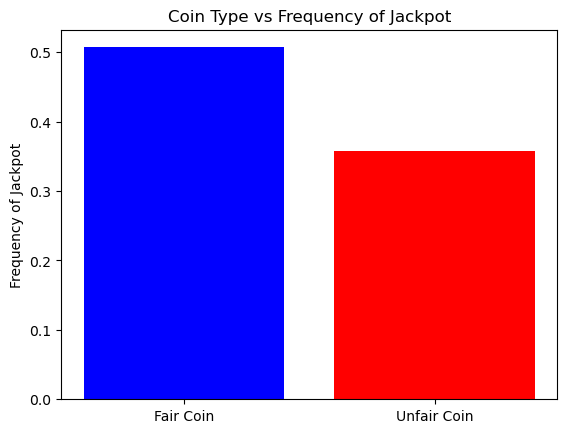

In [16]:
import matplotlib.pyplot as plt

labels = ['Fair Coin', 'Unfair Coin']
values = [task5_freq_fair, task5_freq_unfair]

plt.bar(labels, values, color=['blue', 'red'])
plt.ylabel('Frequency of Jackpot')
plt.title('Coin Type vs Frequency of Jackpot')
plt.show()


## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [19]:
die1 = Die(np.array([1,2,3,4,5,6]))
die2 = Die(np.array([1,2,3,4,5,6]))
die3 = Die(np.array([1,2,3,4,5,6]))

print(die1.current_state())
print(die2.current_state())
print(die3.current_state())

   weight
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
   weight
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
   weight
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [21]:
die1.change_weight_one_side(6,5)

print(die1.current_state())

   weight
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [22]:
die2.change_weight_one_side(1,5)

print(die2.current_state())

   weight
1     5.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [33]:
Scenario2_task4_game = Game([die3 for i in range(5)])

Game.play(Scenario2_task4_game,10000)
#Game.show_results(Scenario2_task4_game)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [30]:
Scenario2_task5_game = Game([die1,die2,die3,die3,die3])

Game.play(Scenario2_task5_game,10000)
#Game.show_results(Scenario2_task5_game)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

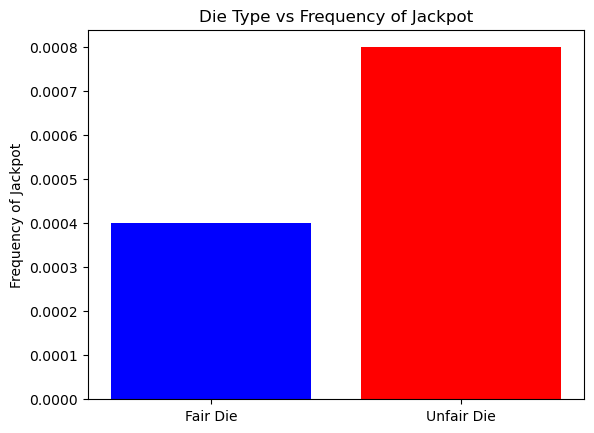

In [35]:
Scenario2_fair = Analyzer(Scenario2_task4_game)
Scenario2_unfair = Analyzer(Scenario2_task5_game)

Scenario2_fair_freq = Analyzer.jackpot(Scenario2_fair)/ len(Game.show_results(Scenario2_task4_game))

Scenario2_unfair_freq = Analyzer.jackpot(Scenario2_unfair)/ len(Game.show_results(Scenario2_task5_game))


labels = ['Fair Die', 'Unfair Die']
values = [Scenario2_fair_freq, Scenario2_unfair_freq]

plt.bar(labels, values, color=['blue', 'red'])
plt.ylabel('Frequency of Jackpot')
plt.title('Die Type vs Frequency of Jackpot')
plt.show()


## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [73]:
import pandas as pd

english_letters = pd.read_csv("english_letters.txt",header=None)

english_letters[['Letter','Weight']] = english_letters.iloc[0:,0].str.split(' ',n=1,expand=True)


letter_die = Die(np.array(english_letters['Letter']))

for i, row in english_letters.iterrows():
    letter_die.change_weight_one_side(row['Letter'],row['Weight'])
    
    
letter_die.current_state()

,weight
E,529117365.0
T,390965105.0
A,374061888.0
O,326627740.0
I,320410057.0
N,313720540.0
S,294300210.0
R,277000841.0
H,216768975.0
L,183996130.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [79]:
letter_game = Game([letter_die for i in range(4)])
Game.play(letter_game,1000) 

letter_game.show_results()

,0,1,2,3
Roll Number,,,,
0,K,M,W,A
1,M,I,T,V
2,A,H,N,T
3,T,S,O,H
4,A,S,E,R
...,...,...,...,...
995,E,R,I,I
996,I,T,M,M
997,E,G,Y,A


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [163]:
#Get all permutations from Game 
letter_analyzer = Analyzer(letter_game)
words = letter_analyzer.permutation_count()

#Clean dataframe to have permutations in same format as scrabble words 
words['Permutations'] = words.index
words.reset_index(drop=True, inplace=True)
words['Permutations'] = words['Permutations'].apply(lambda x: ''.join(x))


scrabble_words = list(pd.read_csv("scrabble_words.txt",header=None).iloc[:,0])
total_scrabble_words = len(scrabble_words) 

number_of_real_words_found = len(words[words['Permutations'].isin(scrabble_words)])

print("There were " + str(number_of_real_words_found) + " real words found in the game run")

print("The difference between permutations and total Scrabble words is " + str(int(total_scrabble_words) - int(number_of_real_words_found)))



There were 52 real words found in the game run
The difference between permutations and total Scrabble words is 279444


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [195]:
letter_game_t4 = Game([letter_die for i in range(5)])
Game.play(letter_game_t4,1000) 

letter_analyzer_t4 = Analyzer(letter_game_t4)
words_t4 = letter_analyzer_t4.permutation_count()

#Clean dataframe to have permutations in same format as scrabble words 
words_t4['Permutations'] = words_t4.index
words_t4.reset_index(drop=True, inplace=True)
words_t4['Permutations'] = words_t4['Permutations'].apply(lambda x: ''.join(x))

number_of_real_words_found_t4 = len(words_t4[words_t4['Permutations'].isin(scrabble_words)])

print("There were " + str(number_of_real_words_found_t4) + " real words found in the game run")

print("The difference between permutations and total Scrabble words is " + str(int(total_scrabble_words) - int(number_of_real_words_found_t4)))



There were 10 real words found in the game run
The difference between permutations and total Scrabble words is 279486
